In [106]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [29]:
data = pd.read_excel('C:/Users/twter/Desktop/Report.xls', encoding='utf-8')
data

,기간,구분,계,아파트 연립다세대,단독주택,노상,상점,숙박업소목욕탕,유흥접객업소,사무실,역대합실,교통수단,유원지,학교,금융기관,기타
0,2017,계,107835,4523,5092,32063,5047,1437,5077,1772,908,2359,754,518,1024,47261
1,2017,살인,142,21,25,27,1,5,10,5,-,1,1,-,-,46
2,2017,강도,169,20,11,43,22,8,5,5,1,-,1,-,3,50
3,2017,강간강제추행,6963,319,413,1061,116,408,495,130,242,1105,51,49,1,2573
4,2017,절도,41162,1209,1340,8255,4119,670,1809,564,335,744,282,247,990,20598
5,2017,폭력,59399,2954,3303,22677,789,346,2758,1068,330,509,419,222,30,23994


In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data = data.drop(['기간','기타'],axis=1)
data

,구분,계,아파트 연립다세대,단독주택,노상,상점,숙박업소목욕탕,유흥접객업소,사무실,역대합실,교통수단,유원지,학교,금융기관
0,계,107835,4523,5092,32063,5047,1437,5077,1772,908,2359,754,518,1024
1,살인,142,21,25,27,1,5,10,5,-,1,1,-,-
2,강도,169,20,11,43,22,8,5,5,1,-,1,-,3
3,강간강제추행,6963,319,413,1061,116,408,495,130,242,1105,51,49,1
4,절도,41162,1209,1340,8255,4119,670,1809,564,335,744,282,247,990
5,폭력,59399,2954,3303,22677,789,346,2758,1068,330,509,419,222,30


In [33]:
data['아파트비율']=data['아파트 연립다세대']/data['계']*100
data['주택비율']=data['단독주택']/data['계']*100
data['노상비율']=data['노상']/data['계']*100
data['영리업소비율']=(data['상점']+data['숙박업소목욕탕']+data['유흥접객업소'])/data['계']*100
data

,구분,계,아파트 연립다세대,단독주택,노상,상점,숙박업소목욕탕,유흥접객업소,사무실,역대합실,교통수단,유원지,학교,금융기관,아파트비율,주택비율,노상비율,영리업소비율
0,계,107835,4523,5092,32063,5047,1437,5077,1772,908,2359,754,518,1024,4.194371,4.722029,29.733389,10.721009
1,살인,142,21,25,27,1,5,10,5,-,1,1,-,-,14.788732,17.605634,19.014085,11.267606
2,강도,169,20,11,43,22,8,5,5,1,-,1,-,3,11.834320,6.508876,25.443787,20.710059
3,강간강제추행,6963,319,413,1061,116,408,495,130,242,1105,51,49,1,4.581359,5.931351,15.237685,14.634497
4,절도,41162,1209,1340,8255,4119,670,1809,564,335,744,282,247,990,2.937175,3.255430,20.054905,16.029347
5,폭력,59399,2954,3303,22677,789,346,2758,1068,330,509,419,222,30,4.973148,5.560700,38.177410,6.553982


In [95]:
df = data[['구분', '계', '아파트비율','주택비율','노상비율','영리업소비율']]
df2 = data[['구분', '계', '아파트비율','주택비율','노상비율','영리업소비율']]

df

,구분,계,아파트비율,주택비율,노상비율,영리업소비율
0,계,107835,4.194371,4.722029,29.733389,10.721009
1,살인,142,14.788732,17.605634,19.014085,11.267606
2,강도,169,11.834320,6.508876,25.443787,20.710059
3,강간강제추행,6963,4.581359,5.931351,15.237685,14.634497
4,절도,41162,2.937175,3.255430,20.054905,16.029347
5,폭력,59399,4.973148,5.560700,38.177410,6.553982


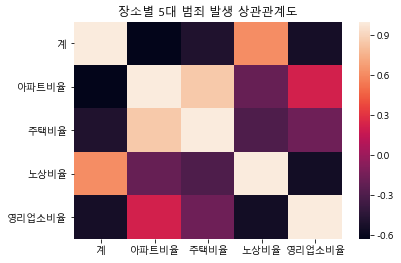

In [56]:
corr = df.corr(method='pearson')
sns.heatmap(data=corr)
plt.title('장소별 5대 범죄 발생 상관관계도')
plt.show()
# 별 의미 없을 듯..

In [80]:
df.set_index('구분', inplace=True)
df

,계,아파트비율,주택비율,노상비율,영리업소비율
구분,,,,,
계,107835,4.194371,4.722029,29.733389,10.721009
살인,142,14.788732,17.605634,19.014085,11.267606
강도,169,11.834320,6.508876,25.443787,20.710059
강간강제추행,6963,4.581359,5.931351,15.237685,14.634497
절도,41162,2.937175,3.255430,20.054905,16.029347
폭력,59399,4.973148,5.560700,38.177410,6.553982


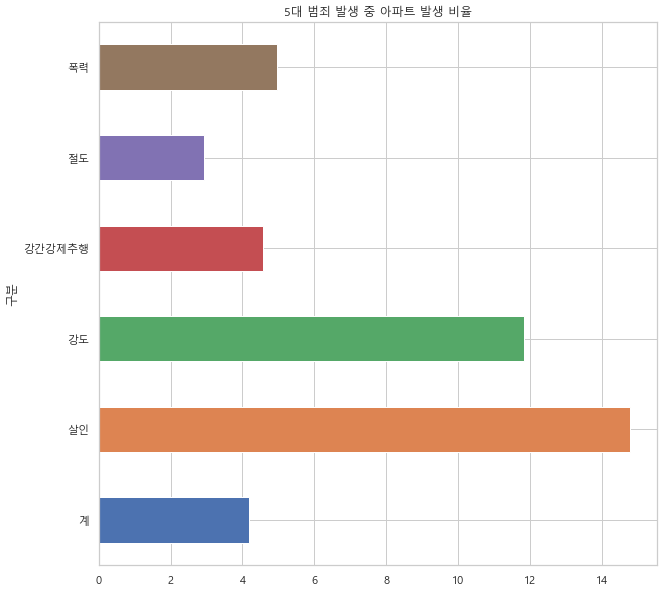

In [87]:
plt.figure()
df['아파트비율'].plot(kind = 'barh', grid = True, figsize =(10,10))
plt.title('5대 범죄 발생 중 아파트 발생 비율')
plt.show()

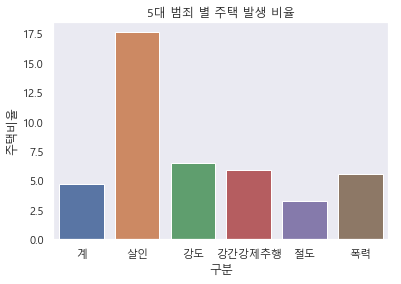

In [107]:
sns.barplot(x='구분',y='주택비율',data=df2)
sns.set()
sns.set_style('dark')
plt.title('5대 범죄 별 주택 발생 비율')
plt.show()